# classification

## Importing the libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [52]:
dataset = pd.read_csv('breast_cancer.csv')
dataset


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [53]:
dataset.drop('Sample code number', axis=1, inplace=True)
dataset

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [55]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Splitting the dataset into the Independent and Dependent variable

In [56]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [57]:
X

array([[ 1,  1,  1, ...,  3,  1,  1],
       [ 4,  4,  5, ...,  3,  2,  1],
       [ 1,  1,  1, ...,  3,  1,  1],
       ...,
       [10, 10,  3, ...,  8, 10,  2],
       [ 8,  6,  4, ..., 10,  6,  1],
       [ 8,  8,  5, ..., 10,  4,  1]])

In [58]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

## Splitting the dataset into the Training set and Test set

In [59]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
X_train

array([[1, 1, 1, ..., 5, 4, 1],
       [1, 1, 1, ..., 3, 1, 1],
       [1, 1, 1, ..., 3, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 2, 1, 1],
       [9, 7, 3, ..., 7, 7, 1]])

In [61]:
X_test

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  2,  1,  1],
       [ 5,  5,  2, ...,  4,  3,  1],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [10,  4,  7, ...,  9, 10,  1],
       [ 1,  1,  1, ...,  2,  1,  1]])

In [62]:
y_train

array([4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2,
       2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2,

In [63]:
y_test

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2])

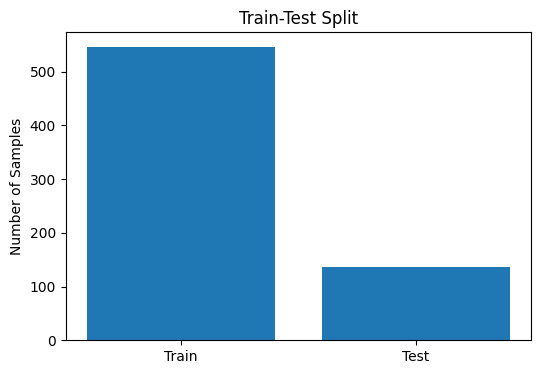

In [64]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Test'], [len(X_train), len(X_test)])
plt.title('Train-Test Split')
plt.ylabel('Number of Samples')
plt.show()

## Training the  models on the Training set

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


##load models in Dictionary

In [66]:
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'Svm': SVC(random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0)
}

In [67]:
trained_models = {}
model_accuracies = {}

for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    trained_models[model_name] = model

    # Predicting the Test set results
    y_pred = model.predict(X_test)

    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} - Confusion Matrix:")
    print(cm)

    # Computing the accuracy with k-Fold Cross Validation
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    model_accuracies[model_name] = accuracies.mean() * 100
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print()

Logistic Regression - Confusion Matrix:
[[83  4]
 [ 3 47]]
Accuracy: 96.70 %
Standard Deviation: 2.43 %

Svm - Confusion Matrix:
[[82  5]
 [ 2 48]]
Accuracy: 96.71 %
Standard Deviation: 2.27 %

Decision Tree - Confusion Matrix:
[[82  5]
 [ 4 46]]
Accuracy: 94.51 %
Standard Deviation: 2.45 %



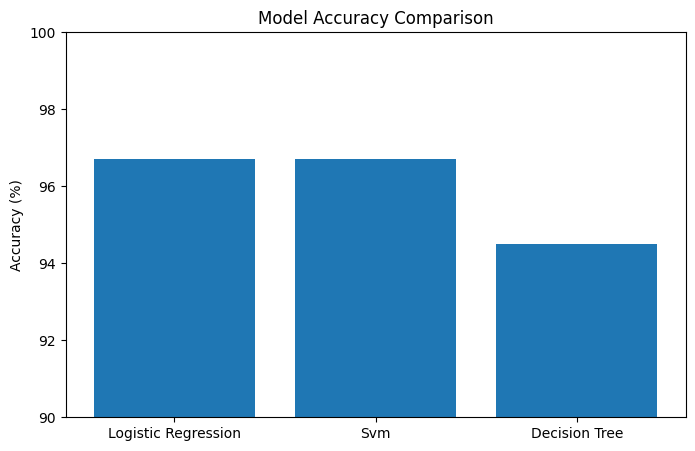

In [68]:
## Plotting Model Comparison
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(90, 100)
plt.show()


In [69]:
new_data= [[5, 5, 1, 1, 1, 2, 1, 3, 1]]


In [71]:
prediction = trained_models['Svm'].predict(new_data)

if prediction[0] == 2:
    print("Benign")
else:
    print("Malignant")

Benign
